## Install pymatch

In [4]:
#!pip install pymatch

You should consider upgrading via the 'C:\Users\10157\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pymatch: filename=pymatch-0.3.4-py3-none-any.whl size=9117 sha256=04f48d969b7cc52fc093ab199aea1a5d17875ca62f40276b2664671d1849718a
  Stored in directory: c:\users\10157\appdata\local\pip\cache\wheels\f2\10\99\d835e60df49ea4e8dffe9b92225760e449e887d54e8d109b5e
Successfully built pymatch


## Import Libs

In [1]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np

%matplotlib inline

## Prepare Data

In [2]:
data = pd.read_csv('census_data/co_2014.csv')

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data

,population,income,house_value,rent,tract,unemployment,poverty
0,3504,42608,430500,2001,8035014506,0.04,0.06
1,7359,39786,219200,1738,8035014603,0.05,0.03
2,4096,52089,276200,1685,8035014604,0.06,0.11
3,5984,30932,359400,1591,8037000301,0.06,0.05
4,2289,32500,639000,943,8037000302,0.07,0.07
...,...,...,...,...,...,...,...
1244,4287,21353,197000,764,8029965200,0.13,0.19
1245,3695,20719,114900,735,8043978200,0.15,0.21
1246,5341,22057,146700,610,8043978500,0.05,0.18
1247,5165,23180,156600,778,8043978300,0.06,0.20


#### basic statistics of cummulative months

In [5]:
tract_records = pd.read_csv('tract_records.csv')
tract_records.rename(columns = {'Unnamed: 0':'tract'}, inplace = True)

In [6]:
tract_records

,tract,2014_med,2015_med,2016_med,2017_med,2018_med,2019_med,2020_med,2021_med,2014_rec,2015_rec,2016_rec,2017_rec,2018_rec,2019_rec,2020_rec,2021_rec,total
0,2000,4.0,144.0,254.0,386.0,516.0,631.0,734.0,801.0,4.0,68.0,119.0,167.0,221.0,275.0,319.0,355.0,1156.0
1,967602,0.0,24.0,48.0,72.0,88.0,107.0,131.0,153.0,0.0,28.0,54.0,90.0,118.0,149.0,185.0,225.0,378.0
2,10402,0.0,12.0,27.0,40.0,56.0,80.0,104.0,122.0,NaN,NaN,3.0,15.0,31.0,55.0,79.0,97.0,219.0
3,1901,0.0,12.0,27.0,51.0,75.0,99.0,123.0,147.0,NaN,NaN,3.0,15.0,27.0,39.0,51.0,76.0,223.0
4,12208,14.0,67.0,133.0,211.0,258.0,296.0,335.0,359.0,14.0,67.0,133.0,214.0,273.0,328.0,391.0,438.0,797.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
302,969601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
303,965201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
304,12904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN


In [7]:
tract_records['2014_both'] = tract_records['2014_med']+tract_records['2014_rec']
tract_records['2014_both'].fillna(0, inplace=True)

In [8]:
tract_records['2014_both'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       8.0
1       0.0
2       0.0
3       0.0
4      28.0
       ... 
301     0.0
302     0.0
303     0.0
304     0.0
305     0.0
Name: 2014_both, Length: 306, dtype: float64>

We only have tract records for 306 tracts, so assuming  others do not have any dispensary.

#### merge two datasets 

In [9]:
len(tract_records)

306

In [10]:
len(data)

1249

In [11]:
data['tract_str'] = data['tract'].astype(str)

In [12]:
def last_6_digit(x):
    return x[-6:]

In [13]:
data['tract_str_last6'] = data['tract_str'].apply(last_6_digit)

In [14]:
data['tract'] = data['tract_str_last6'].astype(int)

In [15]:
data['tract']

0        14506
1        14603
2        14604
3          301
4          302
         ...  
1244    965200
1245    978200
1246    978500
1247    978300
1248    978600
Name: tract, Length: 1249, dtype: int32

In [16]:
data_prepared = pd.merge(data, tract_records, on = "tract", how="left")

In [17]:
data_prepared['2014_both'].fillna(0, inplace=True)

In [18]:
data_prepared['2014_both'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       0.0
1       0.0
2       0.0
3       0.0
4       8.0
       ... 
1244    0.0
1245    0.0
1246    0.0
1247    0.0
1248    0.0
Name: 2014_both, Length: 1249, dtype: float64>

In [46]:
data_prepared['2014_both'].value_counts()

0.0     1174
16.0      17
22.0      15
8.0        8
12.0       7
9.0        5
18.0       5
10.0       4
4.0        2
33.0       2
5.0        2
2.0        2
20.0       2
17.0       1
14.0       1
36.0       1
26.0       1
Name: 2014_both, dtype: int64

Among all 1249 tracts, the median of cummulative months is 0.

In [19]:
data_prepared.columns 

Index(['population', 'income', 'house_value', 'rent', 'tract', 'unemployment',
       'poverty', 'tract_str', 'tract_str_last6', '2014_med', '2015_med',
       '2016_med', '2017_med', '2018_med', '2019_med', '2020_med', '2021_med',
       '2014_rec', '2015_rec', '2016_rec', '2017_rec', '2018_rec', '2019_rec',
       '2020_rec', '2021_rec', 'total', '2014_both'],
      dtype='object')

In [20]:
data_prepared = data_prepared[['population', 'income', 'house_value', 'rent', 'unemployment',
       'poverty', 'tract', '2014_both']]

In [21]:
data_prepared.columns

Index(['population', 'income', 'house_value', 'rent', 'unemployment',
       'poverty', 'tract', '2014_both'],
      dtype='object')

#### Create test and control groups and let dispensary_status to be a binary treatment indicator.

In [70]:
test = data_prepared[data_prepared['2014_both'] <= 12 ]
control = data_prepared[data_prepared['2014_both'] > 12]
test['dispensary_status'] = 0
control['dispensary_status'] = 1
test = test.drop(['2014_both'], axis=1)
control = control.drop(['2014_both'], axis=1)

In [71]:
test.sample()

,population,income,house_value,rent,unemployment,poverty,tract,dispensary_status
974,4001,25074,197900,821,0.13,0.18,1901,0


In [72]:
control.sample()

,population,income,house_value,rent,unemployment,poverty,tract,dispensary_status
1070,2506,30082,430600,1225,0.06,0.15,12501,1


## Create Matcher and do the matching

In [73]:
m = Matcher(test, control, yvar="dispensary_status", exclude=[])

Formula:
dispensary_status ~ population+income+house_value+rent+unemployment+poverty+tract
n majority: 1192
n minority: 45


data imbalance noticed

In [74]:
np.random.seed(42)
m.fit_scores(balance=True, nmodels=200)

Fitting Models on Balanced Samples: 200\200
Average Accuracy: 65.63%


In [75]:
m.predict_scores()

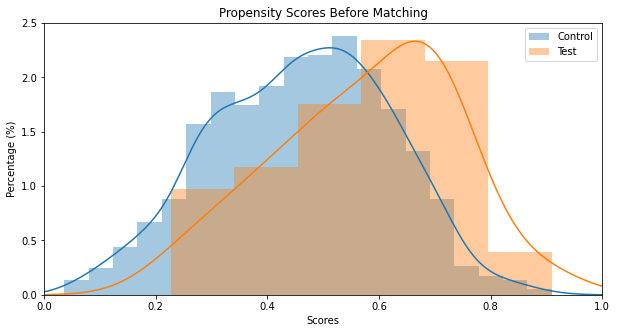

In [76]:
m.plot_scores()

In [77]:
m.match(method="min", nmatches=1, threshold=0.0001)

In [80]:
matched_pairs_df = m.matched_data.sort_values("match_id")

In [81]:
matched_pairs_df

,population,income,house_value,rent,unemployment,poverty,tract,dispensary_status,scores,match_id,record_id
1204,3150,30923,181900,935,0.10,0.04,6812,1,0.538191,0,1204
1159,1766,26132,123800,806,0.14,0.21,4009,0,0.538284,0,1159
1205,3010,33648,168900,1160,0.04,0.20,1403,1,0.511776,1,1205
1116,6627,19237,98100,881,0.15,0.35,3500,0,0.511807,1,1116
1206,12030,41944,196900,1395,0.06,0.06,4503,1,0.227179,2,1206
...,...,...,...,...,...,...,...,...,...,...,...
1145,3298,13020,333200,1329,0.08,0.40,201,0,0.737664,42,1145
1247,2571,34411,192100,894,0.02,0.02,100,1,0.616062,43,1247
492,4840,22223,218000,680,0.12,0.15,9607,0,0.616461,43,492
1248,2435,33013,236300,784,0.07,0.08,14900,1,0.548909,44,1248


In [82]:
matched_pairs_df.to_csv('matched_pairs.csv')